In [1]:
#uber supply demand Gap

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:

import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

In [8]:
uber=pd.read_csv('C:\\Users\\singh\\Downloads\\Uber Request Data.csv')
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0000,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0000,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0000,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0000,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0000,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [9]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0000,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0000,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0000,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0000,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0000,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [10]:
uber.shape

(6745, 6)

In [11]:
uber.describe()

,Request id,Driver id
count,6745.0000,4095.0000
mean,3384.6449,149.5013
std,1955.0997,86.0520
min,1.0000,1.0000
25%,1691.0000,75.0000
50%,3387.0000,149.0000
75%,5080.0000,224.0000
max,6766.0000,300.0000


In [13]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [17]:
sum(uber.duplicated(subset="Request id"))==0

True

In [18]:
df_null=uber.isna().mean().round(4)*100
df_null.sort_values(ascending=False)


Drop timestamp      58.0300
Driver id           39.2900
Pickup point         0.0000
Request id           0.0000
Status               0.0000
Request timestamp    0.0000
dtype: float64

In [20]:
uber.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

In [29]:
uber['Request timestamp']

0           11-7-2016 11:51
1           11-7-2016 17:57
2            12-7-2016 9:17
3           12-7-2016 21:08
4       13-07-2016 08:33:16
               ...         
6740    15-07-2016 23:49:03
6741    15-07-2016 23:50:05
6742    15-07-2016 23:52:06
6743    15-07-2016 23:54:39
6744    15-07-2016 23:55:03
Name: Request timestamp, Length: 6745, dtype: object

In [40]:
pd.to_datetime(uber['Request timestamp'], format='mixed', dayfirst=True)

0      2016-07-11 11:51:00
1      2016-07-11 17:57:00
2      2016-07-12 09:17:00
3      2016-07-12 21:08:00
4      2016-07-13 08:33:16
               ...        
6740   2016-07-15 23:49:03
6741   2016-07-15 23:50:05
6742   2016-07-15 23:52:06
6743   2016-07-15 23:54:39
6744   2016-07-15 23:55:03
Name: Request timestamp, Length: 6745, dtype: datetime64[ns]

In [41]:
uber['Request timestamp']=uber['Request timestamp'].astype(str)
uber['Request timestamp']=uber['Request timestamp'].str.replace('/','-')
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'], format='mixed', dayfirst=True)


In [42]:
uber['Drop timestamp']=uber['Drop timestamp'].astype(str)
uber['Drop timestamp']=uber['Drop timestamp'].str.replace('/','-')
uber['Drop timestamp']=pd.to_datetime(uber['Drop timestamp'],  format='mixed', dayfirst=True)

In [43]:
req_hr=uber['Request timestamp'].dt.hour
req_hr.value_counts()
uber['Req hour']=req_hr

req_day=uber['Request timestamp'].dt.day
req_day.value_counts()
uber['Req day']=req_day

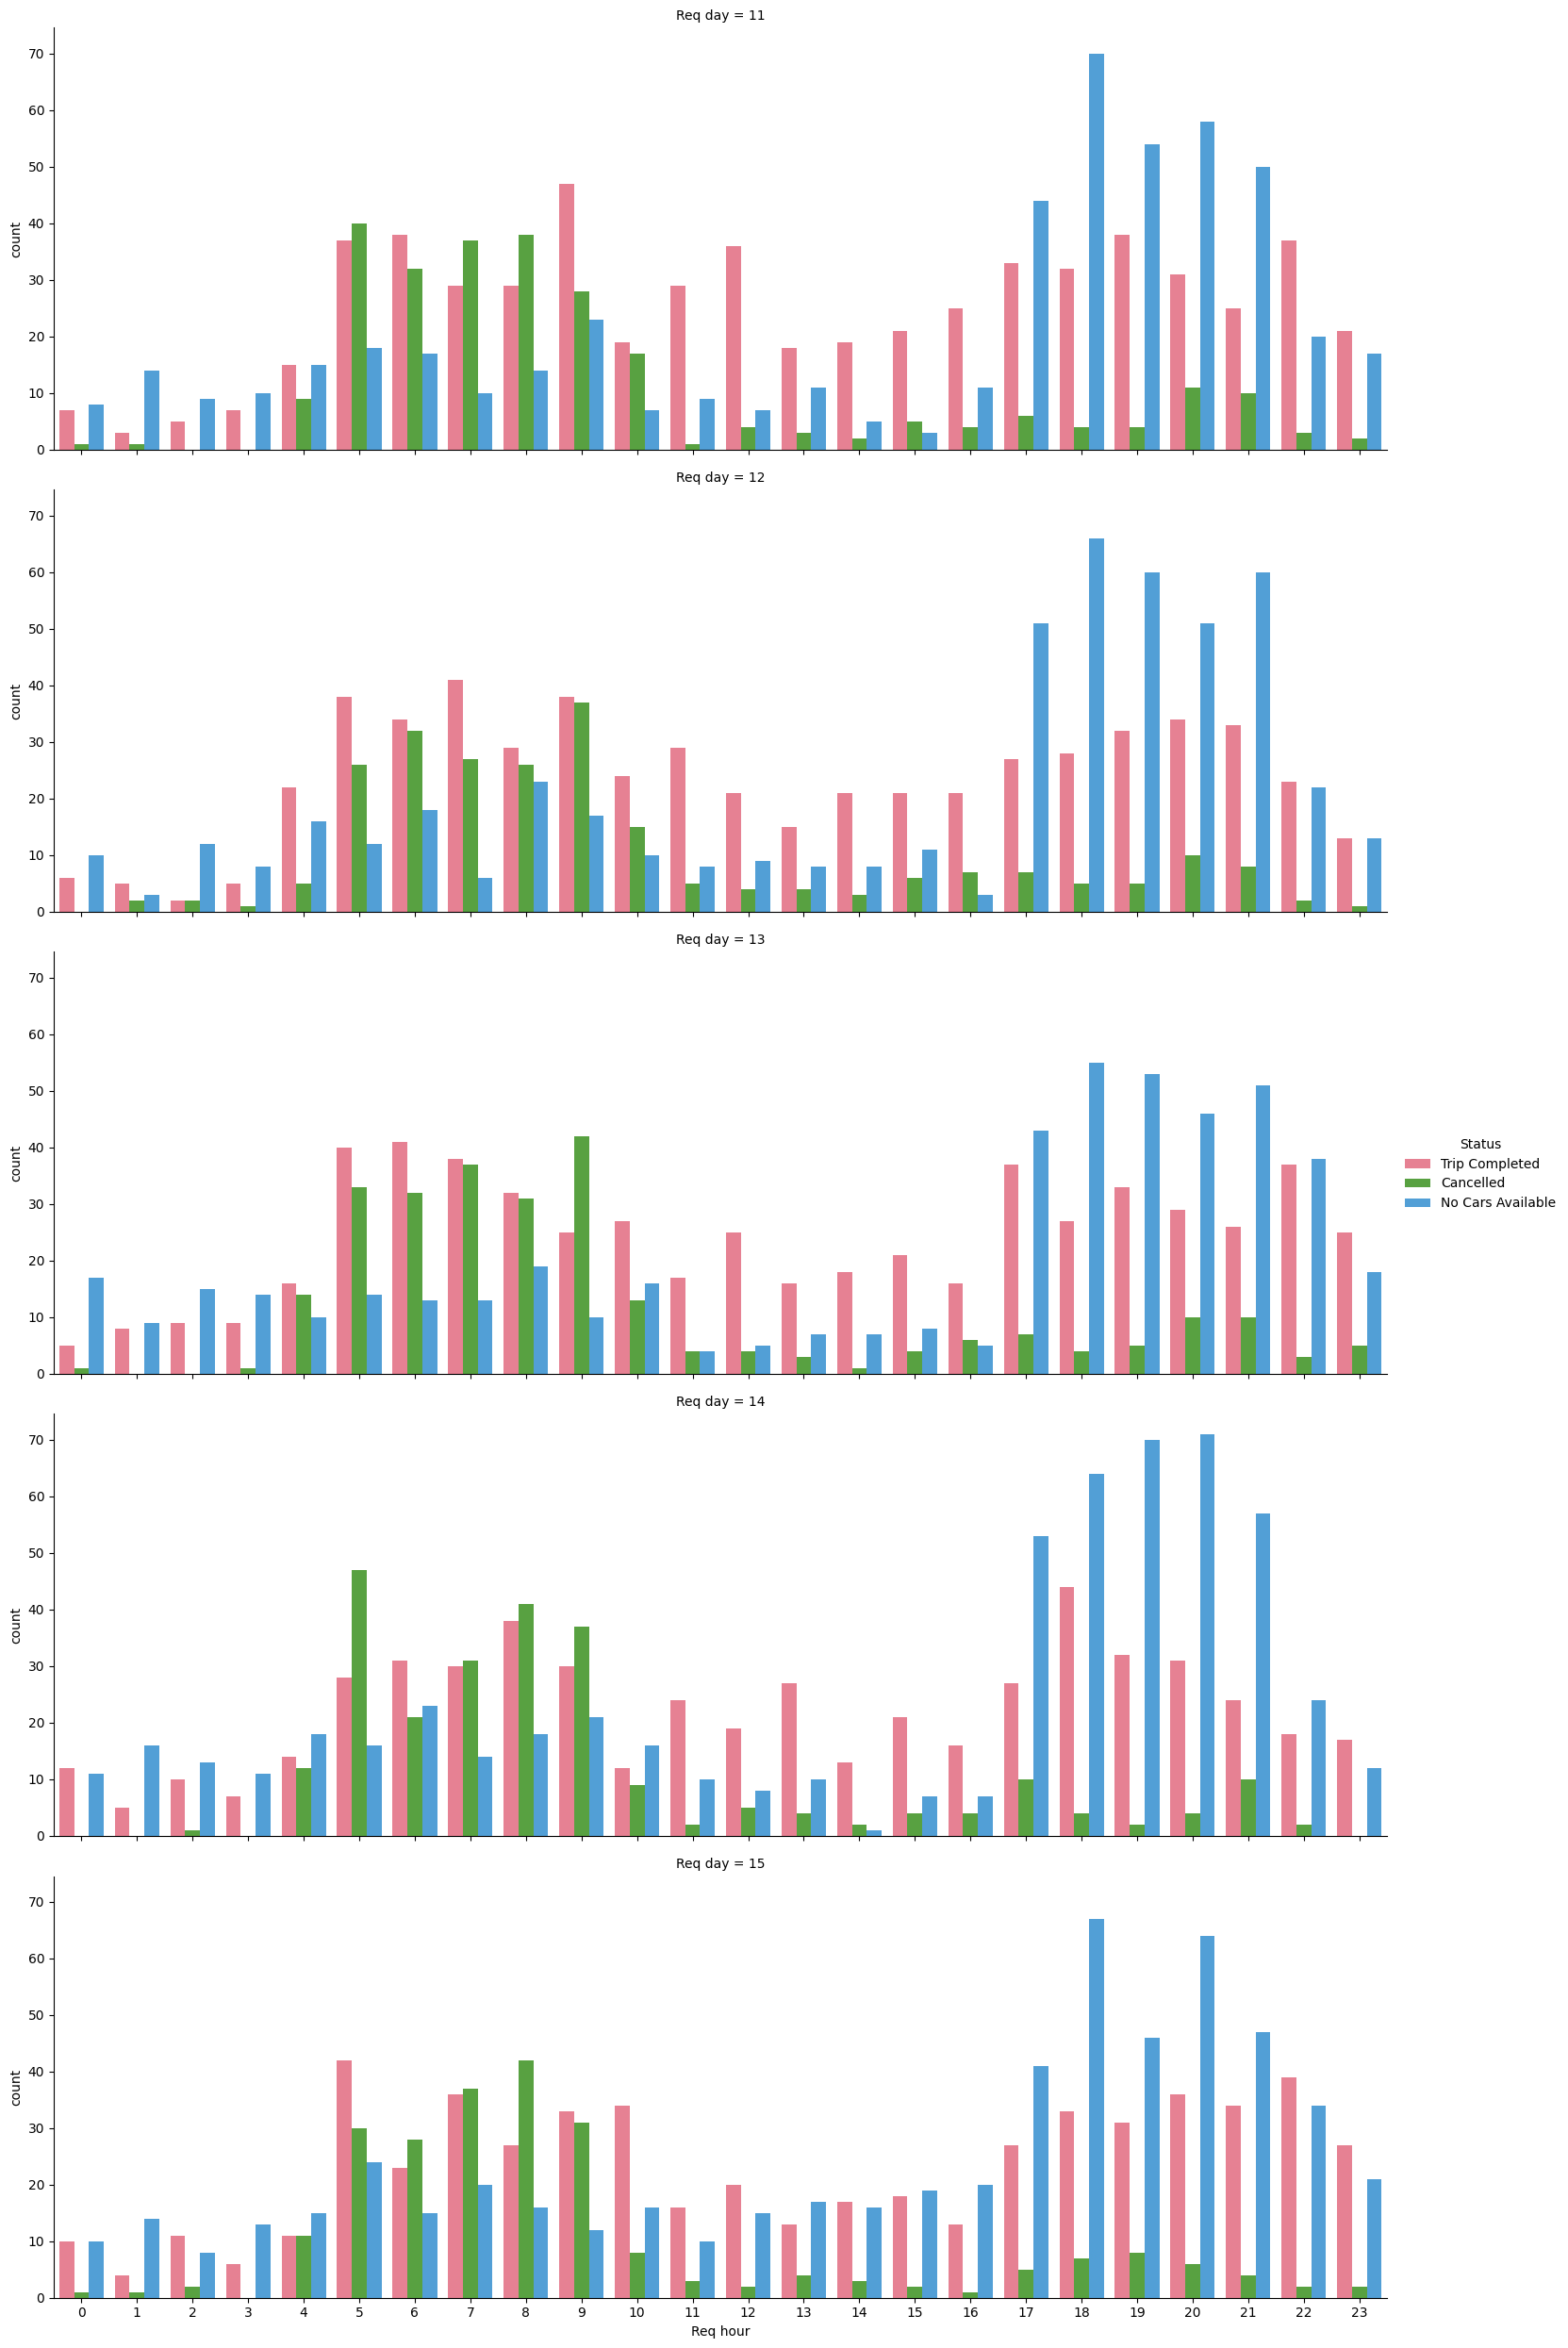

In [50]:
sns.catplot(x='Req hour',hue='Status',row='Req day',data=uber,kind='count',aspect=3,palette='husl')

In [52]:
# #No Cars available sistuation occurs primarly at evening hours from 5PM to 10 PM.
# Frequent Cancellations were encountered in morning hours

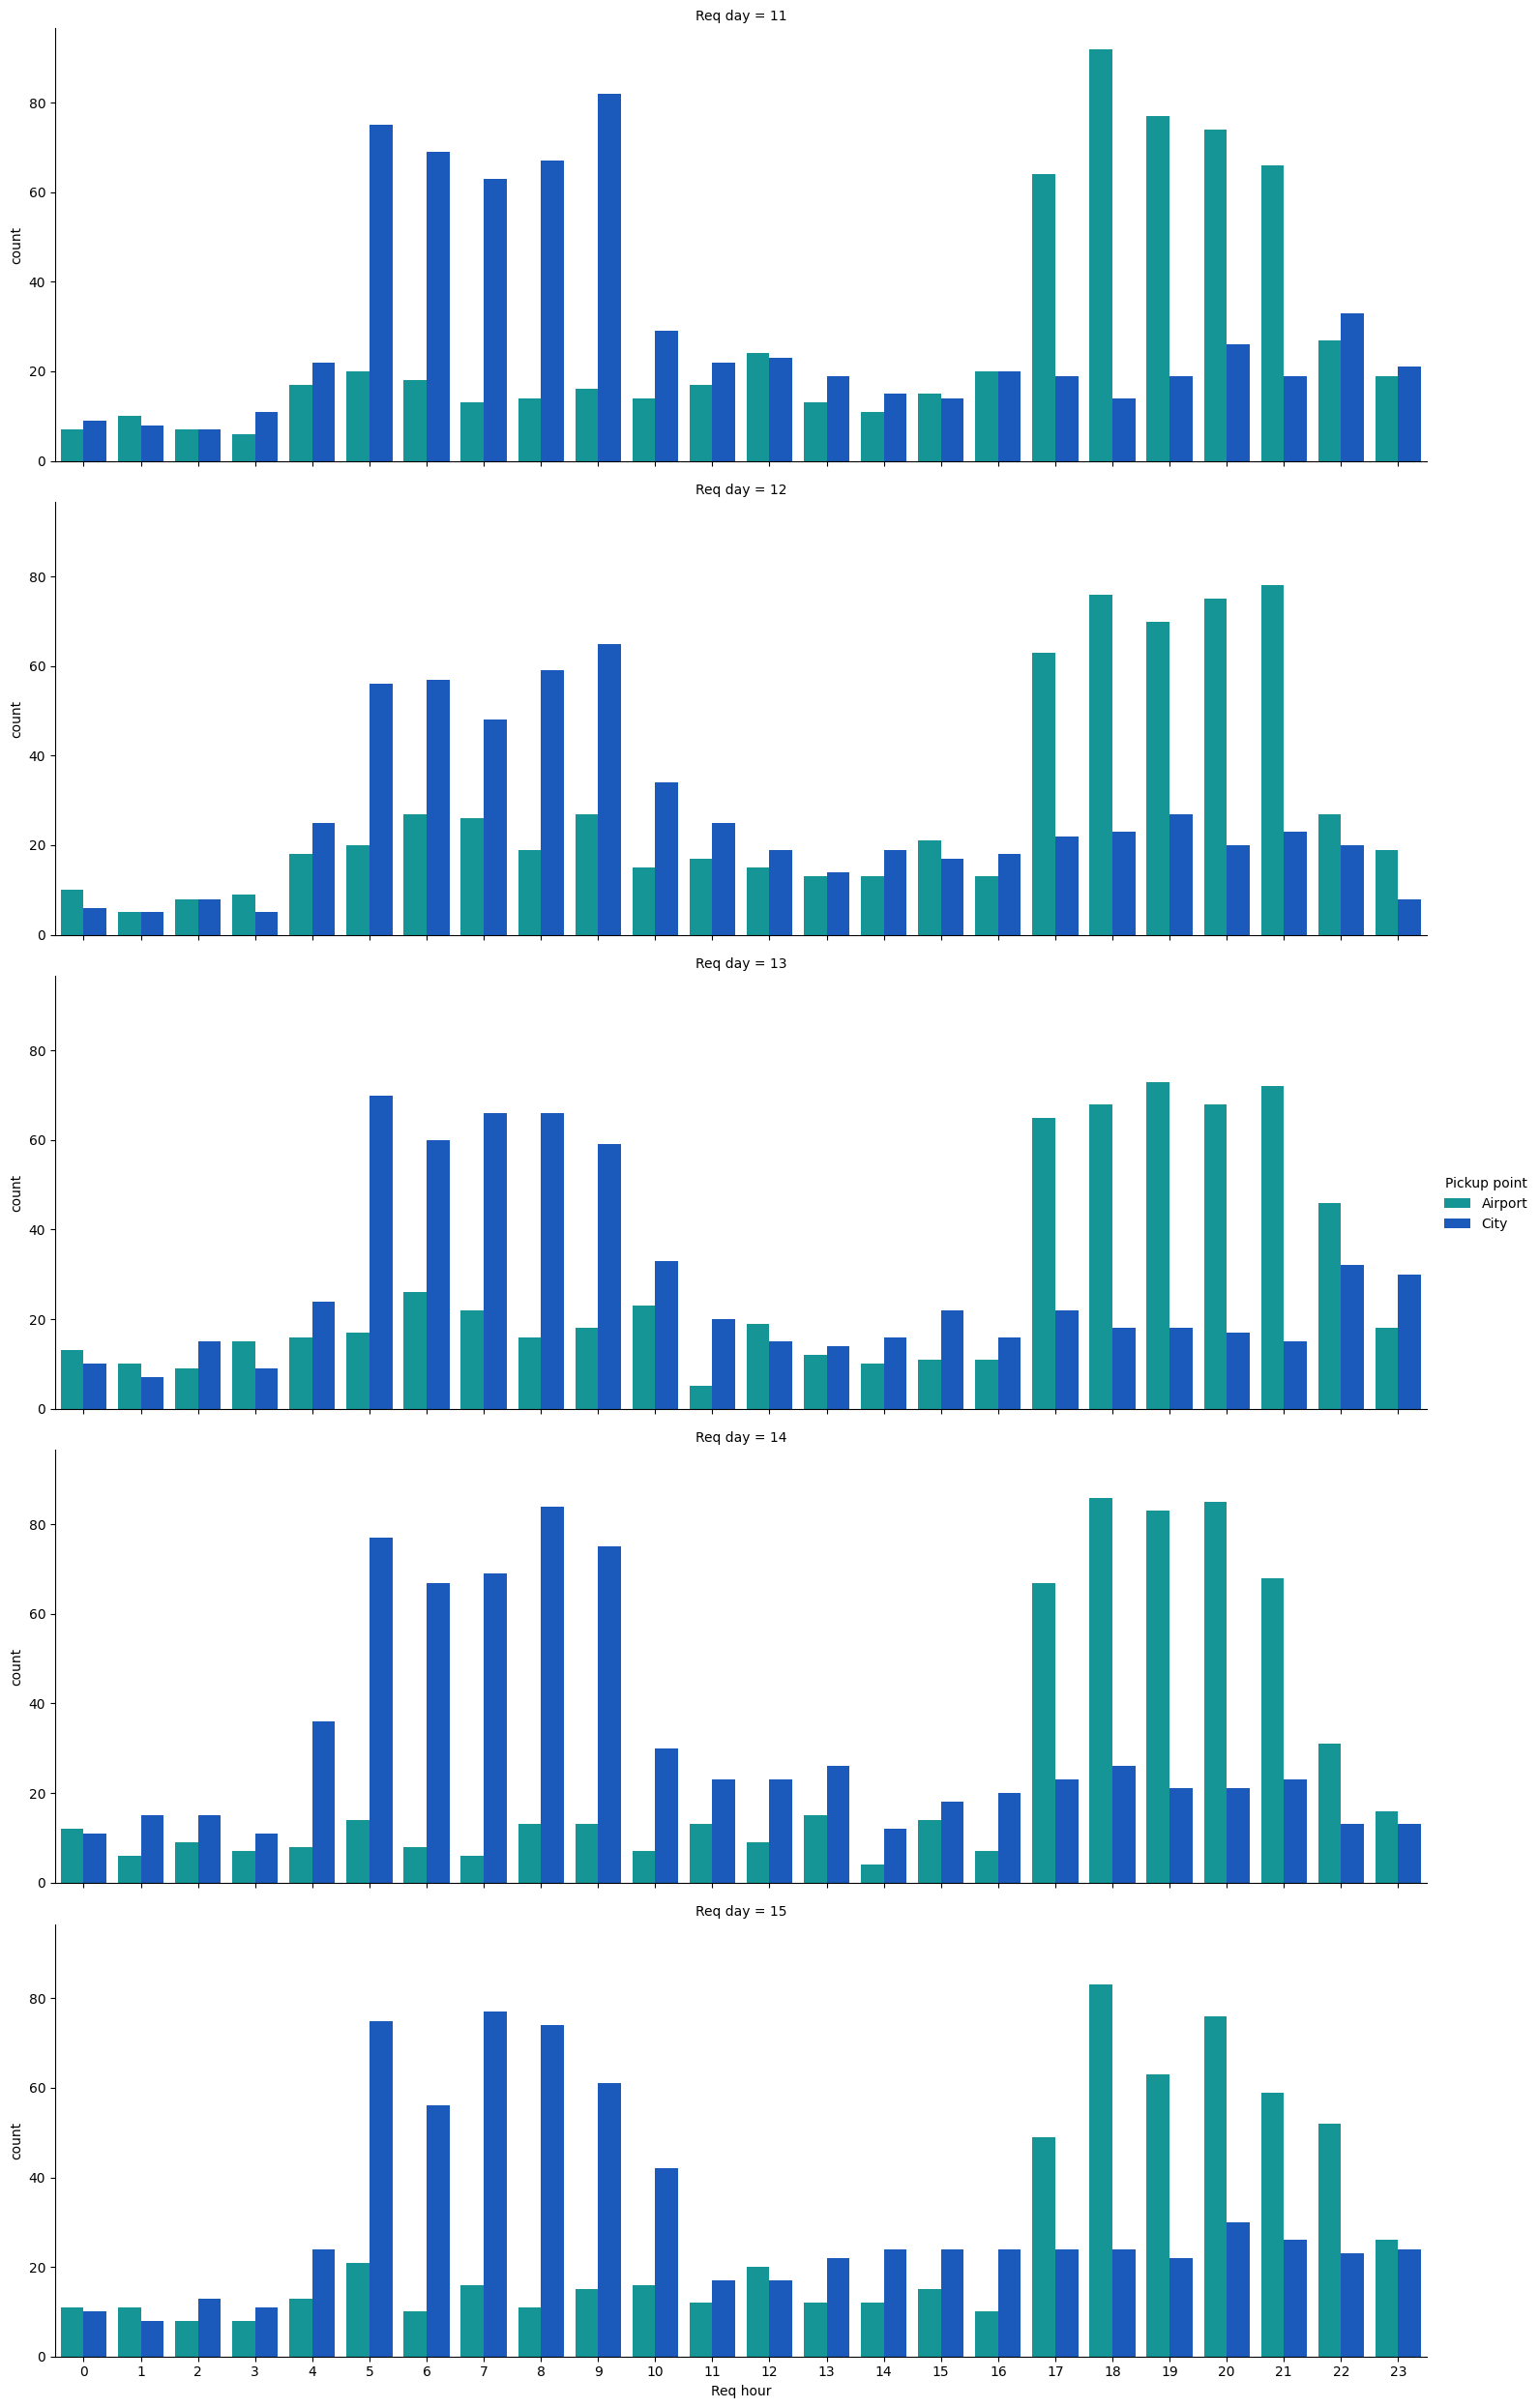

In [56]:
sns.catplot(x='Req hour',hue='Pickup point',row='Req day',data=uber,kind='count',aspect=3,palette='winter_r')

In [57]:
# Most of the pickups encountered at daytime is from city suggesting more people travel to the airport in day hours.
# The pickups from Airport at evening hours are more and it suggests most people land in evening hours.

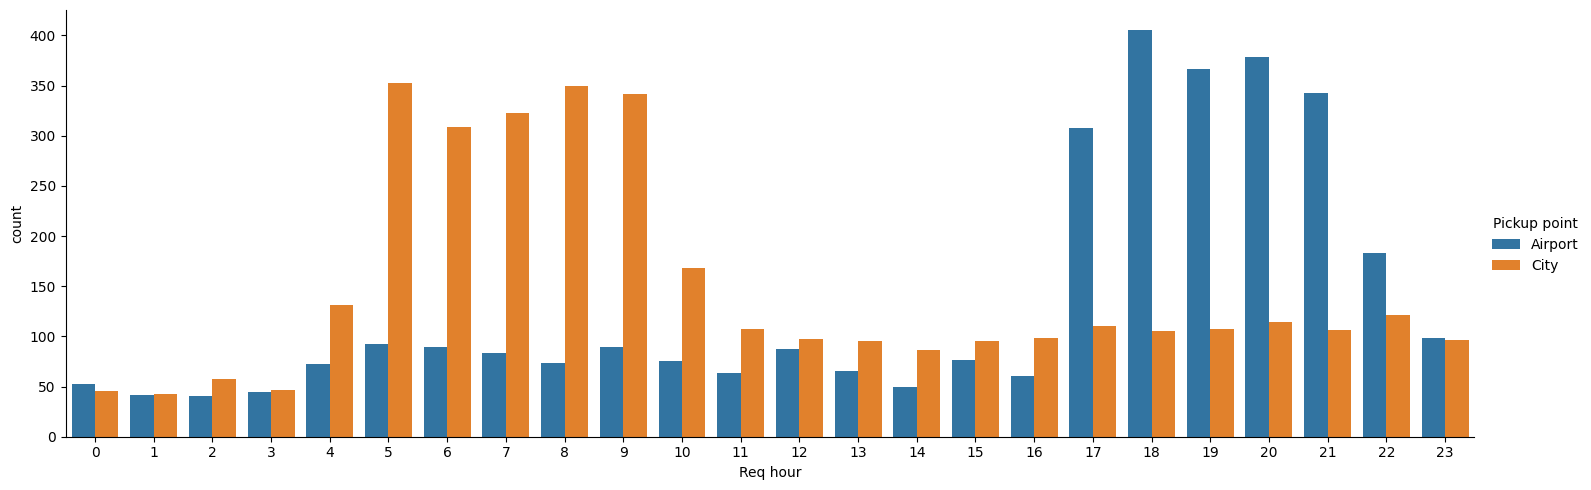

In [58]:
sns.catplot(x='Req hour',hue='Pickup point',data=uber,kind='count',aspect=3)

In [59]:
time_hour=[0,5,10,17,22,24]
time_slots=['Early Morning','Morning_Rush','Daytime','Evening_Rush','Late_Night']
uber['Time_slot']=pd.cut(uber['Req hour'],bins=time_hour,labels=time_slots)

Text(0, 0.5, 'Number of occurence ')

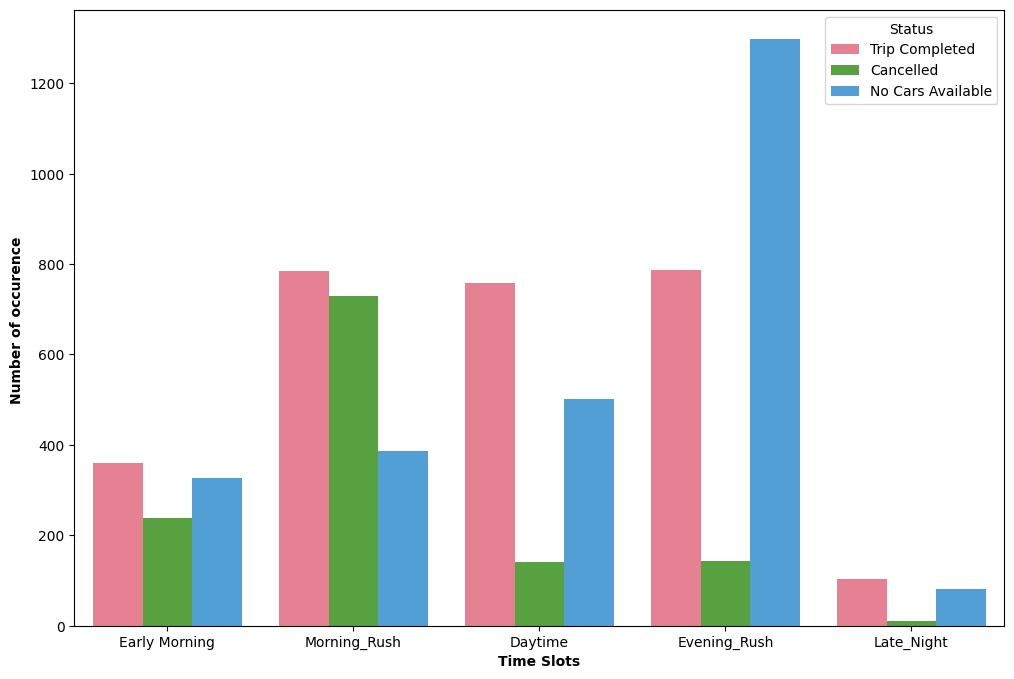

In [61]:
plt.rcParams['figure.figsize'] = [12,8]
sns.countplot(x = 'Time_slot', hue = 'Status', data = uber,palette='husl')
plt.xlabel("Time Slots",fontweight = 'bold')
plt.ylabel("Number of occurence ",fontweight = 'bold')

In [62]:
# Cars not available situation arises mostly in evening hours.
# Most of the Cancellation happens in morning hours.

<Axes: xlabel='Pickup point', ylabel='count'>

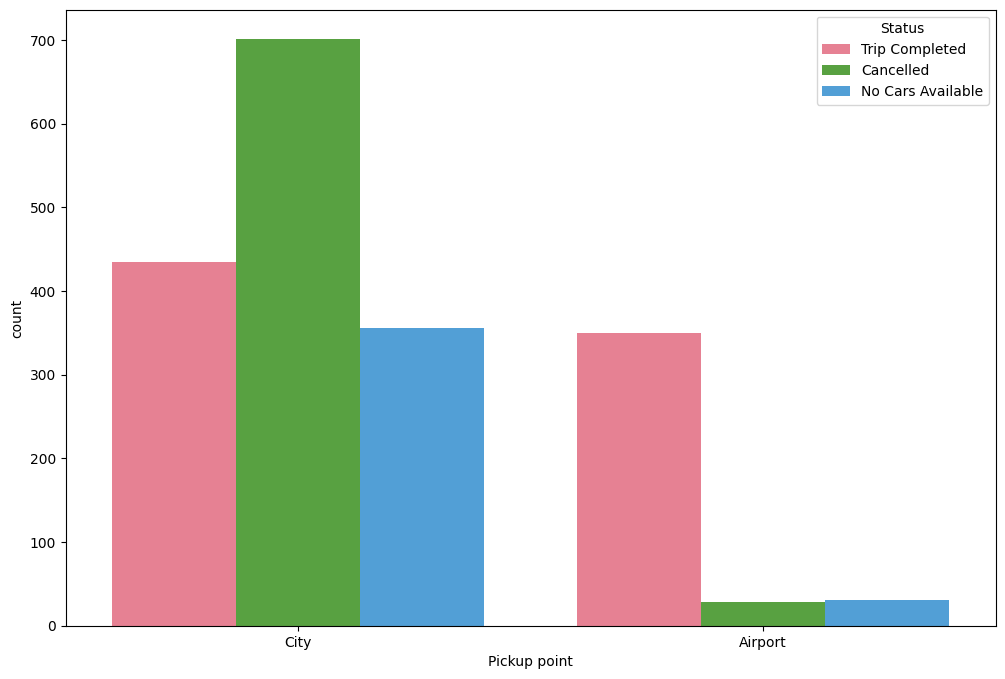

In [64]:
morning_rush=uber[uber['Time_slot']=='Morning_Rush']
sns.countplot(x='Pickup point',hue='Status',data=morning_rush,palette='husl')

In [65]:
#the cancellation situation is a problem for the tri from city to airport in morning hours

<Axes: xlabel='Pickup point', ylabel='count'>

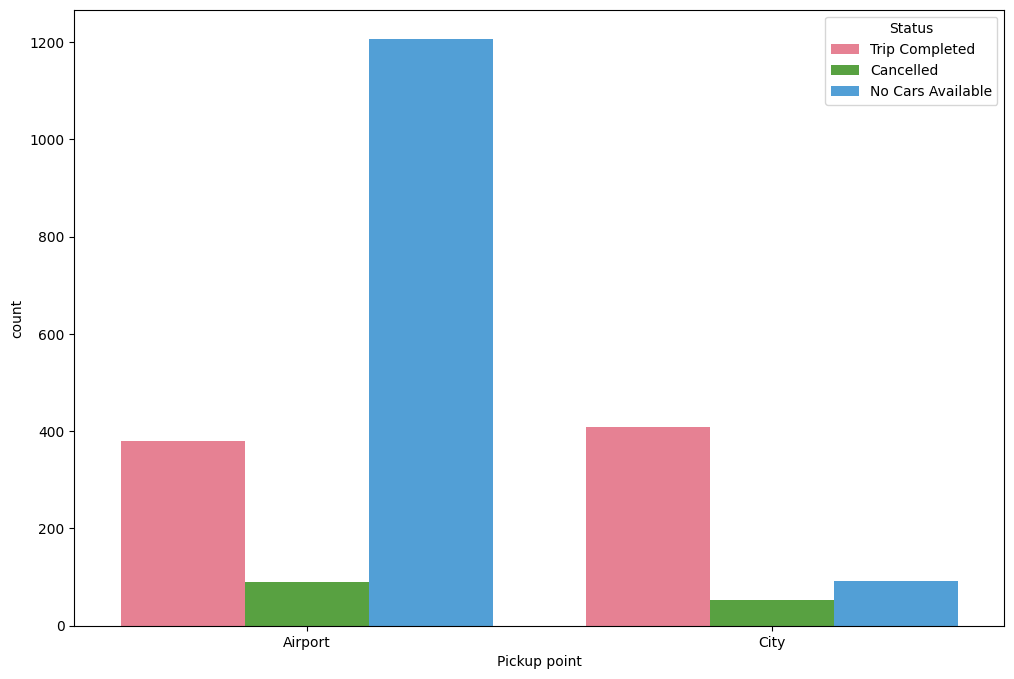

In [67]:
evening_rush=uber[uber['Time_slot']=='Evening_Rush']
sns.countplot(x='Pickup point',hue='Status',data=evening_rush,palette='husl')

In [68]:
#no cars available situation is a problem for the trip from airport to city in evening hours.

In [119]:
def pie_chart(dataframe):
    labels=dataframe['count'].index
    sizes=dataframe['count'].values
    print(labels)
    fig1, ax1=plt.subplots()
    ax1.pie(sizes,labels=labels,autopct='%1.1f%%0',shadow=False,startangle=90)
    ax1.axis('equal')
    plt.show()

Index(['Cancelled', 'Trip Completed', 'No Cars Available'], dtype='object', name='Status')


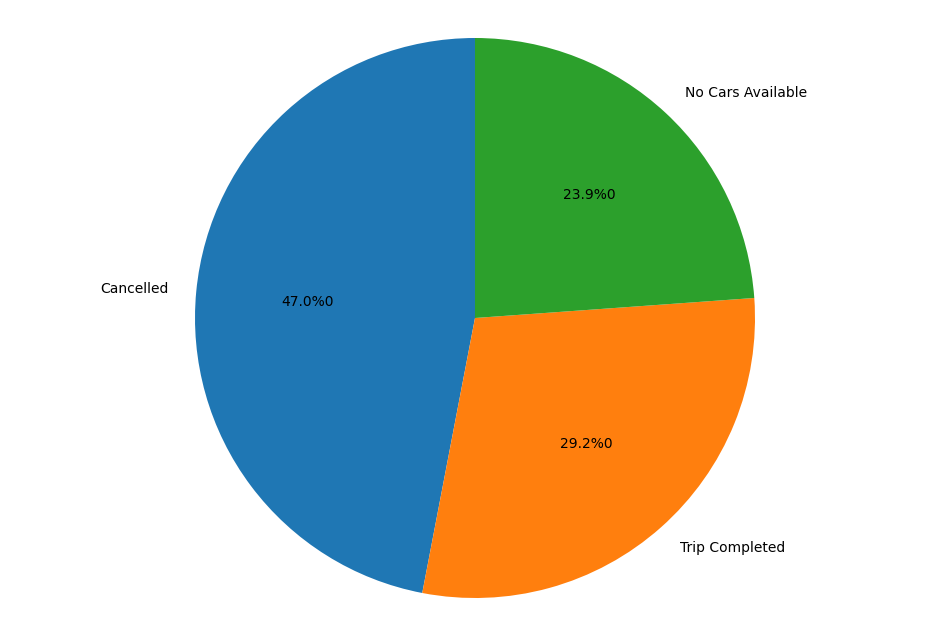

In [120]:
city=uber.loc[(uber['Pickup point']=='City')&(uber.Time_slot=='Morning_Rush')]
city_count=pd.DataFrame(city.Status.value_counts())
pie_chart(city_count)

In [127]:
city_count['count']

array([701, 435, 356])

Index(['Trip Completed', 'No Cars Available', 'Cancelled'], dtype='object', name='Status')


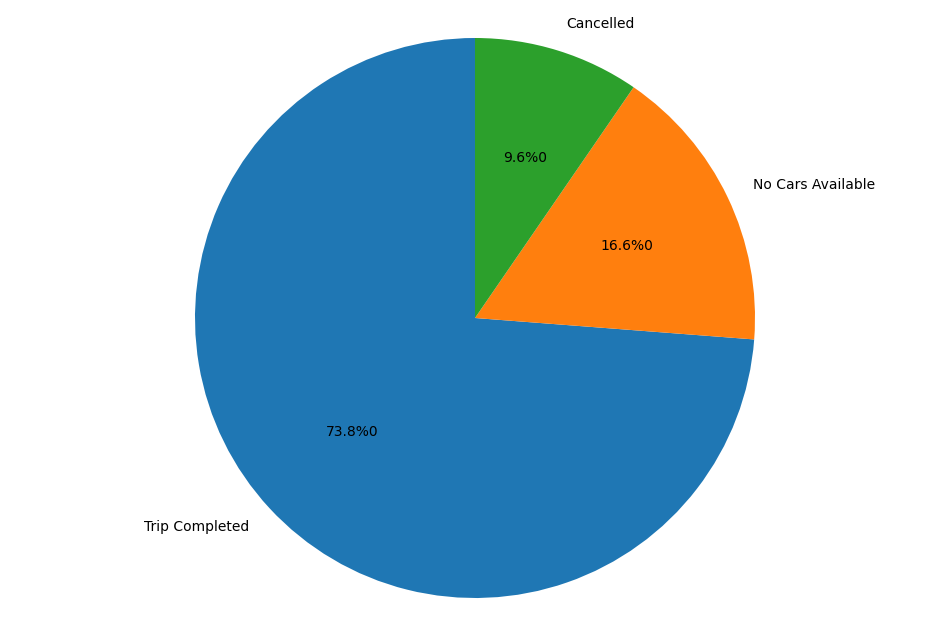

In [128]:
city = uber.loc[(uber["Pickup point"] == "City") & (uber.Time_slot == "Evening_Rush")]
city_count = pd.DataFrame(city.Status.value_counts())
pie_chart(city_count)

Index(['Trip Completed', 'No Cars Available', 'Cancelled'], dtype='object', name='Status')


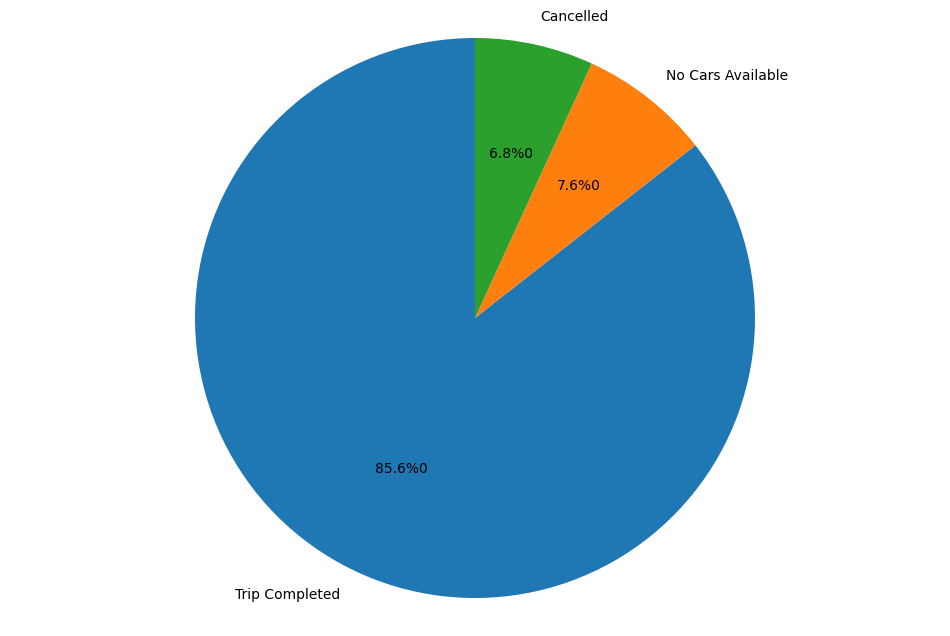

In [129]:
city = uber.loc[(uber["Pickup point"] == "Airport") & (uber.Time_slot == "Morning_Rush")]
city_count = pd.DataFrame(city.Status.value_counts())
pie_chart(city_count)

Index(['No Cars Available', 'Trip Completed', 'Cancelled'], dtype='object', name='Status')


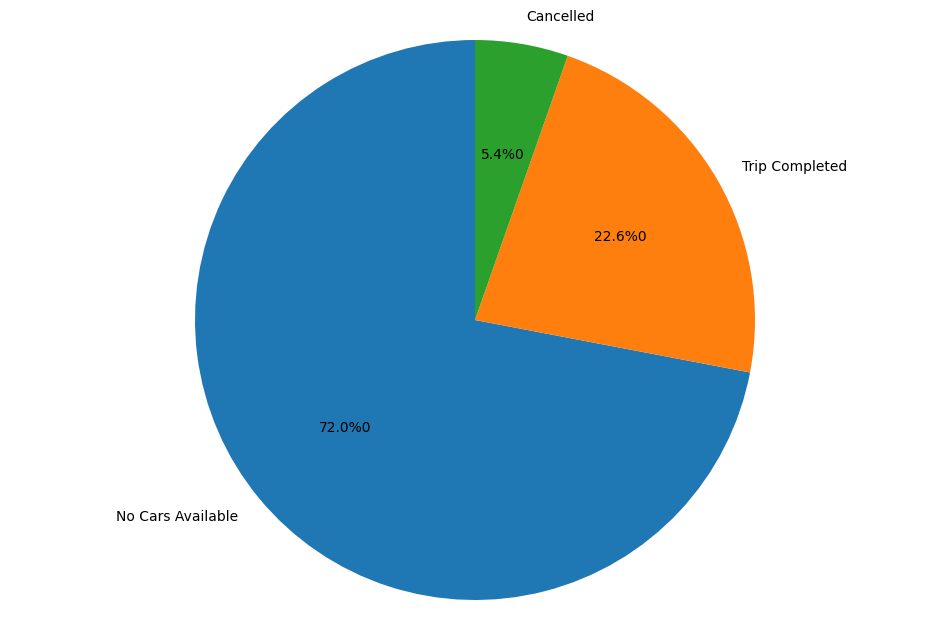

In [130]:
city = uber.loc[(uber["Pickup point"] == "Airport") & (uber.Time_slot == "Evening_Rush")]
city_count = pd.DataFrame(city.Status.value_counts())
pie_chart(city_count)